# Wstęp

Wykonaj i przeanalizuj poniższy skrypt

iris:  (150, 4)
digits:  (1797, 64)
diabetes:  (442, 10)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Etykieta cyfry:  7


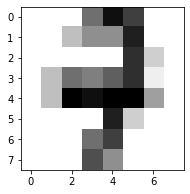

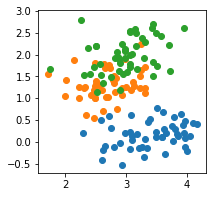

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
import random
import numpy as np

iris = datasets.load_iris()
digits = datasets.load_digits()
diabetes = datasets.load_diabetes()

print("iris: ", iris.data.shape) # macierz rozmiaru (liczba próbek, liczba cech)
print("digits: ", digits.data.shape)
print("diabetes: ", diabetes.data.shape)

print(iris.target)

digit_idx = 43

print("Etykieta cyfry: ", digits.target[digit_idx])

# wyświetlenie przykładowego obrazu
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[digit_idx], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

def disturb_data(X, sigma):
  return X + sigma * np.random.randn(*(X.shape))

plt.figure(1, figsize=(3, 3))
iris_reduced_data = disturb_data(iris.data[:, [1,3]], 0.3)
for d_range in [range(0, 49), range(50, 99), range(100, 149)]:
    plt.scatter(iris_reduced_data[d_range, 0], iris_reduced_data[d_range, 1])
plt.show()


# Zadanie 1

Policz ile jest próbek w poszczególnych klasach

In [36]:
### solution
from collections import Counter
values, counts = np.unique(iris.target, return_counts=True)
print(values, counts)

[0 1 2] [50 50 50]


# Zadanie 2

Podziel zbiór danych `iris_reduced_data` na dwie części: część treningowa (po 40 osobników z każdej klasy) i testowa (po 10 osobników każdej klasy)
Naucz naiwny klasyfikator Bayesa (`GaussianNB`) klasyfikować dane z zestawu `iris_reduced_data` (funkcja `fit` korzystająca z **części treningowej**.
Policz (korzystając z **części testowej**):
*   False positive rate (TNR)
*   True positive rate (FPR)
*   False negative rate (FNR)
*   True negative rate (FNR)
*   Dokładność (accuracy)
*   Czułość (sensitivity)
*   Swoistość (specificity)
*   Krzywą ROC

Jak zmienią się te wskaźniki gdy weźmiemy tylko po 30 osobników z każdej klasy do zbioru treningowego? Jak zmieniają się gdy zmniejszymy błąd dodawany w funkcji `disturb_data`?


In [37]:
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


def train(test_size, err, ind, nb_clf = GaussianNB()):
  iris_reduced_data = disturb_data(iris.data[:, [1,3]], err)

  clf = nb_clf
  
  X_train, X_test, y_train, y_test = train_test_split(
    iris_reduced_data, iris.target, test_size=test_size, random_state=42, stratify=iris.target)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print(f"Report for {test_size*100}% test size with error={err}: ")

  # multilabel confusion matrix here
  conf_matrix = metrics.confusion_matrix(y_test, y_pred)

  sensitivity = round(conf_matrix[ind][ind]/np.sum(conf_matrix[ind,:]),2)       #TPR
  specificity = round(np.sum(np.delete(np.delete(conf_matrix, ind, 1), ind, 0))/np.sum(np.delete(conf_matrix, ind, 0)),2)        #TNR
  fnr = round((1 - sensitivity),2)      #fall-out
  fpr = round((1 - specificity),2)      #miss rate

  accuracy = round((np.sum(np.delete(np.delete(conf_matrix, ind, 1), ind, 0)) + conf_matrix[ind][ind]) / np.sum(conf_matrix),2)
  ppv = round(conf_matrix[ind][ind]/np.sum(conf_matrix[ : , ind]),2)
  npv = round(np.sum(np.delete(np.delete(conf_matrix, ind, 1), ind, 0))/np.sum(np.delete(conf_matrix, ind, 1)),2)


  print('Sensitivity(TPR): ',sensitivity, ', Specificity(TNR): ',specificity, 
        ', Fall-out(FNR): ', fnr, ', Miss Rate(FPR): ', fpr,
        ', PPV: ', ppv, ', NPV: ',npv, ', Accuracy(ACC)',accuracy)
  print('Confusion Matrix:\n',conf_matrix,'\n\n')
  

for i in ([.5,.1,0],[.4,.1,1],[.3,.1,0],[.5,.2,0],[.4,.2,0],[.3,.2,0]):
  train(i[0],i[1],i[2])    



Report for 50.0% test size with error=0.1: 
Sensitivity(TPR):  1.0 , Specificity(TNR):  1.0 , Fall-out(FNR):  0.0 , Miss Rate(FPR):  0.0 , PPV:  1.0 , NPV:  1.0 , Accuracy(ACC) 1.0
Confusion Matrix:
 [[25  0  0]
 [ 0 24  1]
 [ 0  4 21]] 


Report for 40.0% test size with error=0.1: 
Sensitivity(TPR):  0.9 , Specificity(TNR):  0.92 , Fall-out(FNR):  0.1 , Miss Rate(FPR):  0.08 , PPV:  0.86 , NPV:  0.95 , Accuracy(ACC) 0.92
Confusion Matrix:
 [[20  0  0]
 [ 0 18  2]
 [ 0  3 17]] 


Report for 30.0% test size with error=0.1: 
Sensitivity(TPR):  0.87 , Specificity(TNR):  1.0 , Fall-out(FNR):  0.13 , Miss Rate(FPR):  0.0 , PPV:  1.0 , NPV:  0.94 , Accuracy(ACC) 0.96
Confusion Matrix:
 [[13  2  0]
 [ 0 13  2]
 [ 0  3 12]] 


Report for 50.0% test size with error=0.2: 
Sensitivity(TPR):  0.96 , Specificity(TNR):  1.0 , Fall-out(FNR):  0.04 , Miss Rate(FPR):  0.0 , PPV:  1.0 , NPV:  0.98 , Accuracy(ACC) 0.99
Confusion Matrix:
 [[24  1  0]
 [ 0 21  4]
 [ 0  5 20]] 


Report for 40.0% test size 

# Zadanie 3

Powtórz zadanie 2, ale dla klasyfikatora SVM. Użyj kerneli `rbf` i `linear`. Porównaj działanie dla wartości parametru `C=1.0, 10.0, 0.1`. Dla kernela `rbf` przetestuj różne opcje skalowania cech (parametr `gamma`: wartosci `scale`, `auto`, `1.0`, `10.0`, `0.1`.

In [0]:
from sklearn.svm import SVC
clf = SVC(gamma='auto', kernel='rbf')
clf.fit(X, y)

# Zadanie 4

Znajdź najlepsze (pod względem dokładności) parametry klasyfikatora SVM z użyciem 5-krotnej walidacji krzyżowej: kernel, $C$, wybrany parametr kernela. Przeszukaj przynajmniej 100 zestawów wartości.

Czy te same parametry zapewniają najlepszą wartość innych metryk?

Wykorzystaj `from sklearn.model_selection import KFold`

In [0]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC

def evaluate_classifier(C):
  kf = KFold(n_splits=5)
  X = iris_reduced_data
  y = iris.target
  for train_index, test_index in kf.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = SVC(gamma='auto', kernel='rbf', C=C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(metrics.accuracy_score(y_test, y_pred))


for C in [1.0, 3.0, 0.3]:
  print(f"C = {C}")
  evaluate_classifier(C)

C = 1.0
0.9666666666666667
0.8333333333333334
0.5666666666666667
0.8
0.43333333333333335
C = 3.0
1.0
0.8333333333333334
0.7
0.8
0.5
C = 0.3
0.9333333333333333
0.8666666666666667
0.1
0.8333333333333334
0.26666666666666666
